In [1]:
import pickle
from heron import sampling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from heron import regression
gp = regression.load("/home/daniel/repositories/heron/scripts/NSPolytrope_hp.gp")

/home/daniel/.virtualenvs/IGRlaptop21/heron/lib/python2.7/site-packages/matplotlib-2.0.0-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u"'URW Bookman L'"] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


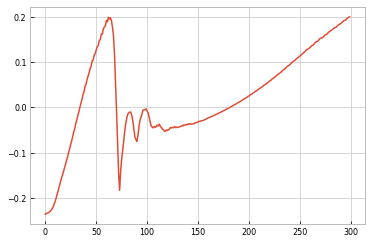

In [3]:
plt.plot(gp.training_y[:300,0]*np.sin(gp.training_y[:300,1]))

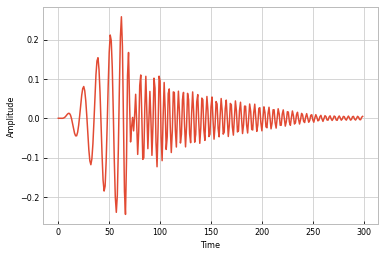

In [30]:
der_data = gp.training_object.denormalise(gp.training_y, "label")[:300]
plt.plot(der_data[:,0] * np.sin(der_data[:,1]))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig("GW_Neutronstar.pdf")

In [5]:
sample_locs = gp.training_object.denormalise(gp.training_data, "target")[:300]

In [15]:
logP1 = 34.25
gamma1 = 2.0
gamma2 = 3.5

times = np.linspace(2000, 5500, 1000)

#sample_locs = sampling.draw_samples(gp, t=(2000,5500,1000), logP1=logP1, gamma1=gamma1, gamma2=gamma2)#, logP1=1.0, gamma1=4, gamma2=6, gamma3=10)
pred = gp.prediction(sample_locs.T)

[  0.    34.25   2.     2.  ] [  6.50380000e+03   6.00000000e-01   1.50000000e+00   1.50000000e+00]


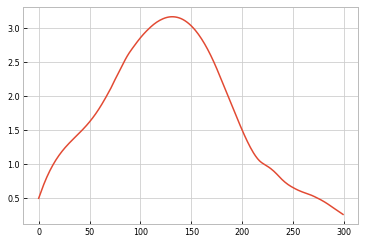

In [7]:
plt.plot(pred[0][1])

In [12]:
gp.get_hyperparameters()

array([-2.7894665 , -1.18169489, -1.78578251, -6.90775534, -2.07147372])

In [13]:
gp.training_object.get_starting()

array([-0.30575894,  0.16666667,  0.        , -0.125     ])

In [25]:
gp.set_hyperparameters([0.01, 0.3, 0.2, 0, 0.125])

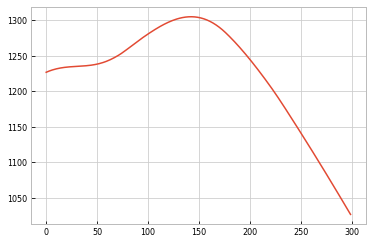

In [26]:
plt.plot(pred[0][0])

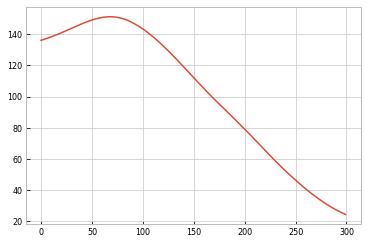

In [27]:
plt.plot(pred[0][0]*np.sin(pred[1][0]))

ValueError: operands could not be broadcast together with shapes (300,) (2,) 

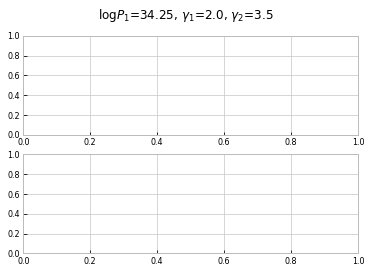

In [11]:
f, ax = plt.subplots(2, 1)
f.suptitle("$\logP_1$={}, $\gamma_1$={}, $\gamma_2$={}".format(logP1, gamma1, gamma2))

pred = gp.training_object.denormalise(np.array(pred[0][0]).T, "label")

ax[0].plot(pred[0]*np.sin(pred[1]), label="h+")
#ax[0].fill_between(times, 
#                 pred[0]+ pred[1]**2, 
#                 pred[0]- pred[1]**2, alpha=0.2)
#ax[1].plot(times, pred[1], label="Variance")
ax[0].legend()
ax[1].legend()

In [126]:
from scipy.optimize import minimize

In [127]:
vec = [  8.30561504,  39.25846755, -20.32869133,   4.01367306,   1.15688994]
MAP = minimize(gp_amp.neg_ln_likelihood, np.random.rand(5)*10)

In [128]:
MAP.x, MAP.fun

(array([ -3.99150665,  -3.92281844,  29.82245225, -11.11173499,   4.14681202]),
 33.74810502966129)

In [112]:
np.random.rand(5)

array([ 0.33237067,  0.99140386,  0.70855616,  0.52943897,  0.89204933])

In [ ]:
logP1 = (34.0, 35.0, 40)
gamma1 = 2.0
gamma2 = 3.5

times = np.linspace(2000, 4000, 300)

sample_locs = sampling.draw_samples(gp, t=(2000,4000,300), logP1=logP1, gamma1=gamma1, gamma2=gamma2)#, logP1=1.0, gamma1=4, gamma2=6, gamma3=10)
pred = gp.prediction(sample_locs.T)

plt.imshow(pred[:,0].reshape(40, 300), aspect=5.0)

[  0.    34.25   2.     2.  ] [  6.50380000e+03   6.00000000e-01   1.50000000e+00   1.50000000e+00]


In [9]:
sample_locs = sampling.draw_samples(gp, t=(0,100,100), logP1=1.0, gamma1=4, gamma2=6, gamma3=10)

In [10]:
import heron.training

In [97]:
from scipy.optimize import minimize

In [98]:
minimize?